In [1]:
import numpy as np # linear algebra
import pandas as pd
from pandas import Series, DataFrame
#Packages related to data visualizaiton
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
#Unbalanced dataset
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
#SVM to measure outliers
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [2]:
data=pd.read_csv("card_transdata.csv")
Total_transactions = len(data)
normal = len(data[data.fraud == 0])
fraudulent = len(data[data.fraud == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 1000000
Number of Normal Transactions are 912597
Number of fraudulent Transactions are 87403
Percentage of fraud Transactions is 9.58


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


(1000000, 8)

In [4]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
#To check if there are null values
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

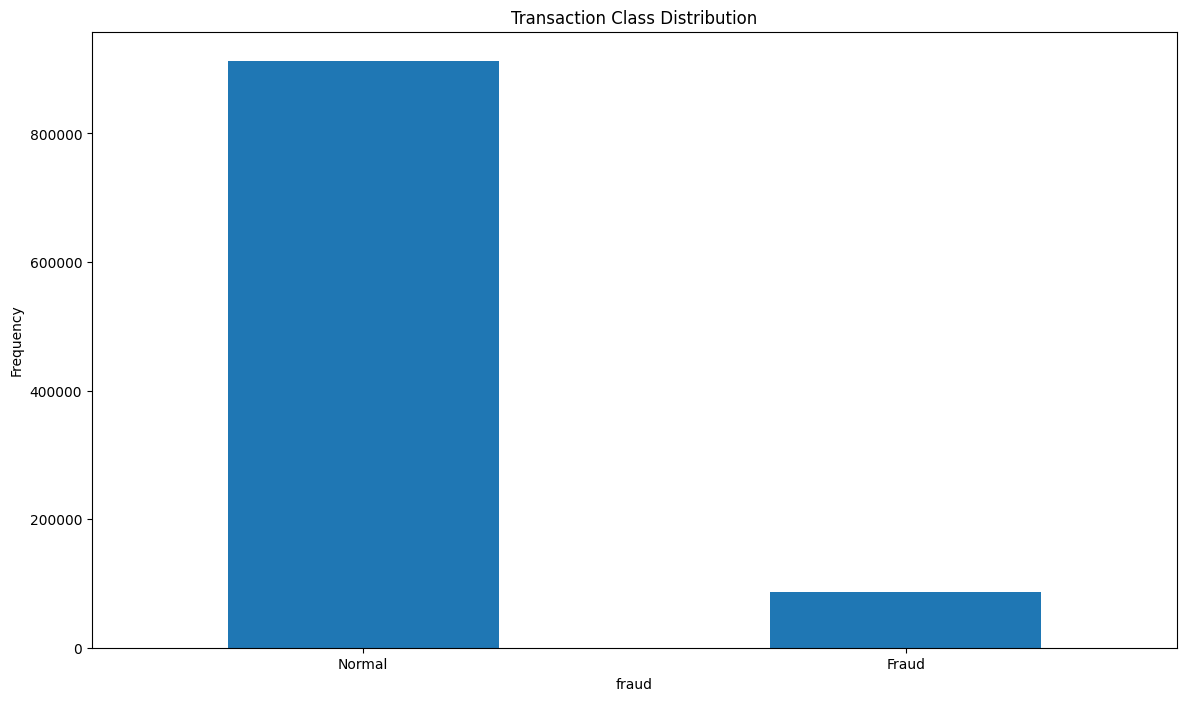

In [6]:
#to count number of classes
count_classes = pd.value_counts(data['fraud'], sort = True)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ['Normal', 'Fraud']
#plot count_classes
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("fraud")
plt.ylabel("Frequency")

In [7]:
# get fraud and normal dataset
fraud = data[data['fraud'] == 1]
normal = data[data['fraud'] == 0]

In [8]:
#Shape of fraud dataset and normal dataset
print(fraud.shape, normal.shape)

(87403, 8) (912597, 8)


In [9]:
X = data.iloc [:, :-1]
Y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 1)

In [10]:
lr = LogisticRegression(max_iter  =10000)
%time model = lr.fit(X_train, y_train)
scores = cross_val_score(model,X_train,y_train,scoring = 'r2',cv = 5)
scores
lr_pred = lr.predict(X_test)
TrainAccuracy =  accuracy_score(y_train, model.predict(X_train))
TestAccuracy =  accuracy_score(y_test, lr_pred)
ConfusionMatrix =  confusion_matrix(y_test, lr_pred)
print("Accuracy of validation data is {}".format(scores.mean()))
print('Accuracy score of the train data is {}'.format(TrainAccuracy))
print('Accuracy score of the test data is {}'.format(TestAccuracy))
print('Confusion Matrix - {}'.format(ConfusionMatrix))

CPU times: total: 8.69 s
Wall time: 9.58 s
Accuracy of validation data is 0.4811870942875136
Accuracy score of the train data is 0.9587628571428571
Accuracy score of the test data is 0.9586166666666667
Confusion Matrix - [[271790   1873]
 [ 10542  15795]]


In [11]:
from xgboost import XGBClassifier
param = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
xgb_model = XGBClassifier()
%time xgb = xgb_model.fit(X_train, y_train)
# y_test_pred_proba = xgb.predict_proba(X_test)[:,1]
# roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
xgb_scores = cross_val_score(xgb,X_train,y_train,scoring = 'r2',cv = 5)
xgb_scores
xgb_pred = xgb.predict(X_test)
xgb_TrainAccuracy =  accuracy_score(y_train, xgb.predict(X_train))
xgb_TestAccuracy =  accuracy_score(y_test, xgb_pred)
xgb_ConfusionMatrix =  confusion_matrix(y_test, xgb_pred)
print("Accuracy of validation data is {}".format(xgb_scores.mean()))
print('Accuracy score of the train data is {}'.format(xgb_TrainAccuracy))
print('Accuracy score of the test data is {}'.format(xgb_TestAccuracy))
print('Confusion Matrix - {}'.format(xgb_ConfusionMatrix))

CPU times: total: 3min 12s
Wall time: 45 s
Accuracy of validation data is 0.9998026505875284
Accuracy score of the train data is 1.0
Accuracy score of the test data is 0.99998
Confusion Matrix - [[273662      1]
 [     5  26332]]


In [12]:
import joblib

In [13]:
from sklearn.ensemble import RandomForest
rf1 = RandomForestClassfier()
rf1.fit(X_train,y_train)

ImportError: cannot import name 'RandomForest' from 'sklearn.ensemble' (C:\Users\sahithi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\__init__.py)

In [14]:
joblib.dump(model,"credit_card_model")

['credit_card_model']

In [15]:
x_model = joblib.load("credit_card_model")

In [16]:
newdata = pd.read_csv("data.csv")

In [17]:
x_model.predict(newdata)

array([1], dtype=int64)

In [18]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
%time knn = KNN.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_scores = cross_val_score(knn,X_train,y_train,scoring = 'r2',cv = 5)
knn_scores
knn_TrainAccuracy =  accuracy_score(y_train, knn.predict(X_train))
knn_TestAccuracy =  accuracy_score(y_test, knn_pred)
knn_ConfusionMatrix =  confusion_matrix(y_test, knn_pred)
print("Accuracy of validation data is {}".format(knn_scores.mean()))
print('Accuracy score of the train data is {}'.format(knn_TrainAccuracy))
print('Accuracy score of the test data is {}'.format(knn_TestAccuracy))
print('Confusion Matrix - {}'.format(knn_ConfusionMatrix))

CPU times: total: 1.77 s
Wall time: 3.65 s
Accuracy of validation data is 0.7562558294291472
Accuracy score of the train data is 0.9885357142857143
Accuracy score of the test data is 0.98213
Confusion Matrix - [[270476   3187]
 [  2174  24163]]


In [19]:
# Model with optimal hyperparameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

%time dt = decision_tree_model.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_scores = cross_val_score(dt,X_train,y_train,scoring = 'r2',cv = 5)
dt_scores
dt_TrainAccuracy =  accuracy_score(y_train, dt.predict(X_train))
dt_TestAccuracy =  accuracy_score(y_test, dt_pred)
dt_ConfusionMatrix =  confusion_matrix(y_test, dt_pred)
print("Accuracy of validation data is {}".format(dt_scores.mean()))
print('Accuracy score of the train data is {}'.format(dt_TrainAccuracy))
print('Accuracy score of the test data is {}'.format(dt_TestAccuracy))
print('Confusion Matrix - {}'.format(dt_ConfusionMatrix))

CPU times: total: 1.58 s
Wall time: 3.55 s
Accuracy of validation data is 0.9809647549021205
Accuracy score of the train data is 0.9985757142857142
Accuracy score of the test data is 0.9985
Confusion Matrix - [[273320    343]
 [   107  26230]]


In [20]:
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    #results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

In [21]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [22]:
# Take some sample of the data
data1 = data.sample(frac = 0.1, random_state = 1)
data1.shape

(100000, 8)

In [23]:
# Determine the number of fraud and valid transaction

Fraud = data1[data1['fraud']  == 1]
Valid = data1[data1['fraud'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))

print(outlier_fraction)

print("Fraud cases : {}".format(len(Fraud)))

print("Valid cases : {}".format(len(Valid)))

0.09674376775353974
Fraud cases : 8821
Valid cases : 91179


In [24]:
# Create dependent and independent features
columns = data1.columns.tolist()

# Filter columns to remove data... we don't need Class column
columns = [c for c in columns if c not in ["fraud"]]

# Store the variable ... to predict
target = "fraud"

# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))

# Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(100000, 7)
(100000,)


In [25]:
# define the outlier detection methods

classifiers = {
    
    "Isolation Forest" : IsolationForest(n_estimators = 100, max_samples = len(X),
                                        contamination = outlier_fraction, random_state = state, verbose = 0),
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, algorithm = 'auto', 
                                               leaf_size = 30, metric = 'minkowski',
                                               p = 2, metric_params = None, contamination = outlier_fraction),
    "Support Vector Machine" : OneClassSVM(kernel = 'rbf', degree = 3, gamma = 0.1, nu = 0.05,
                                          max_iter = -1)
}

In [26]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))
    

C:\Users\sahithi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 14698
Accuracy Score :
0.85302
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     91179
           1       0.20      0.22      0.21      8821

    accuracy                           0.85    100000
   macro avg       0.56      0.56      0.56    100000
weighted avg       0.86      0.85      0.86    100000

Local Outlier Factor: 15092
Accuracy Score :
0.84908
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     91179
           1       0.18      0.19      0.18      8821

    accuracy                           0.85    100000
   macro avg       0.55      0.55      0.55    100000
weighted avg       0.86      0.85      0.85    100000

Support Vector Machine: 10110
Accuracy Score :
0.8989
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     91179
         

------------------ Confusion Matrix --------------------
[[273320    343]
 [   107  26230]]


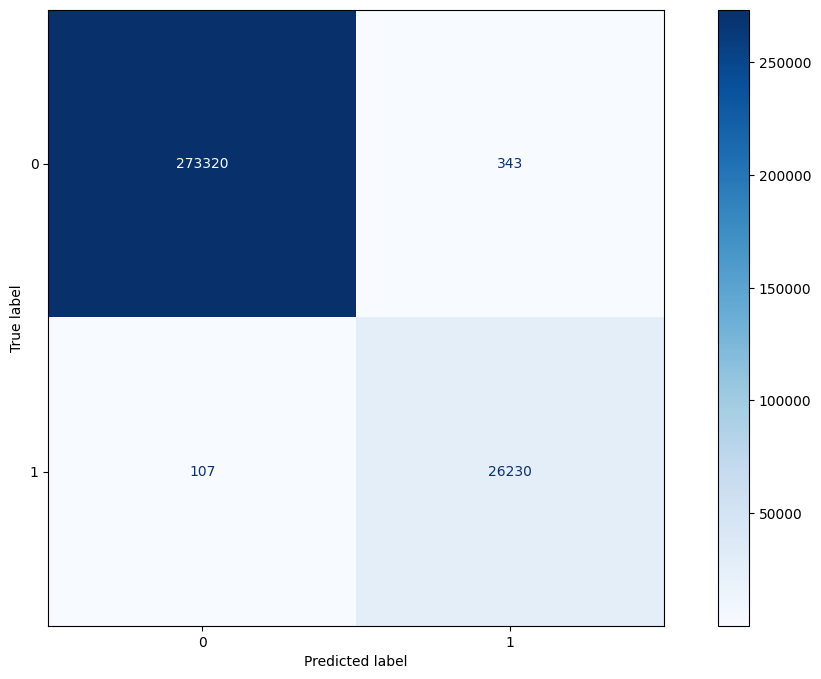

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273663
           1       0.99      1.00      0.99     26337

    accuracy                           1.00    300000
   macro avg       0.99      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

------------------ More Specific classification_report --------------------
Accuracy:- 0.9985
Sensitivity:- 0.9959372745567073
Specificity:- 0.9987466336333374
F1-Score:- 0.9914949914949914
------------------ ROC --------------------


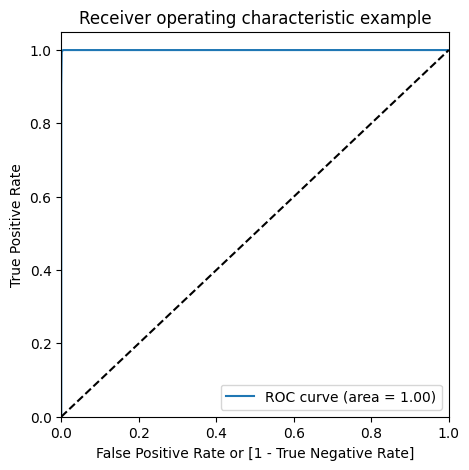

In [27]:
display_test_results("Decision Tree", decision_tree_model)

------------------ Confusion Matrix --------------------
[[271790   1873]
 [ 10542  15795]]


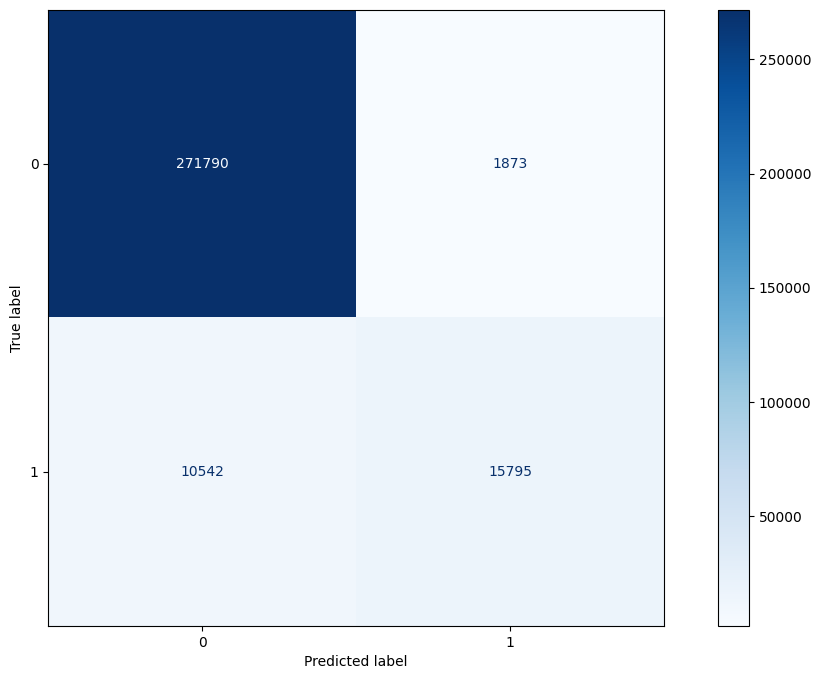

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    273663
           1       0.89      0.60      0.72     26337

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

------------------ More Specific classification_report --------------------
Accuracy:- 0.9586166666666667
Sensitivity:- 0.5997266203440027
Specificity:- 0.9931558157295652
F1-Score:- 0.7178729689807977
------------------ ROC --------------------


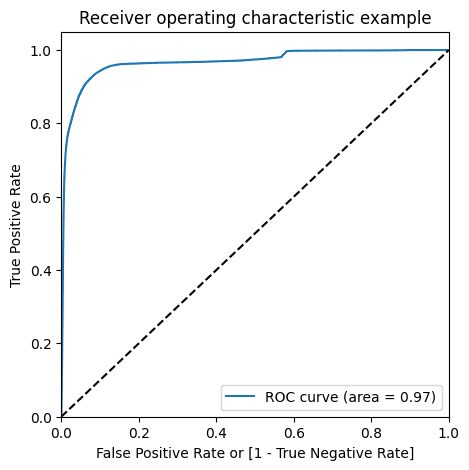

In [28]:
display_test_results("Logistic Regression",lr)

------------------ Confusion Matrix --------------------
[[273662      1]
 [     5  26332]]


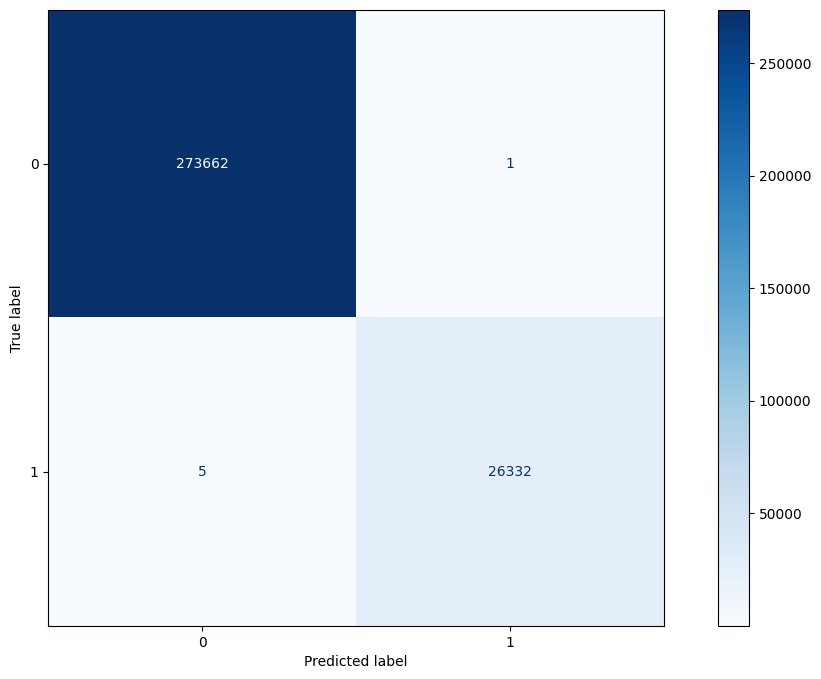

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273663
           1       1.00      1.00      1.00     26337

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

------------------ More Specific classification_report --------------------
Accuracy:- 0.99998
Sensitivity:- 0.9998101530166685
Specificity:- 0.9999963458706511
F1-Score:- 0.9998860831592937
------------------ ROC --------------------


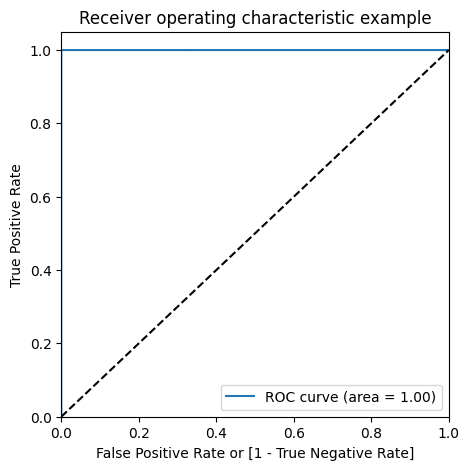

In [29]:
display_test_results("XGBoost", xgb_model)

------------------ Confusion Matrix --------------------
[[270476   3187]
 [  2174  24163]]


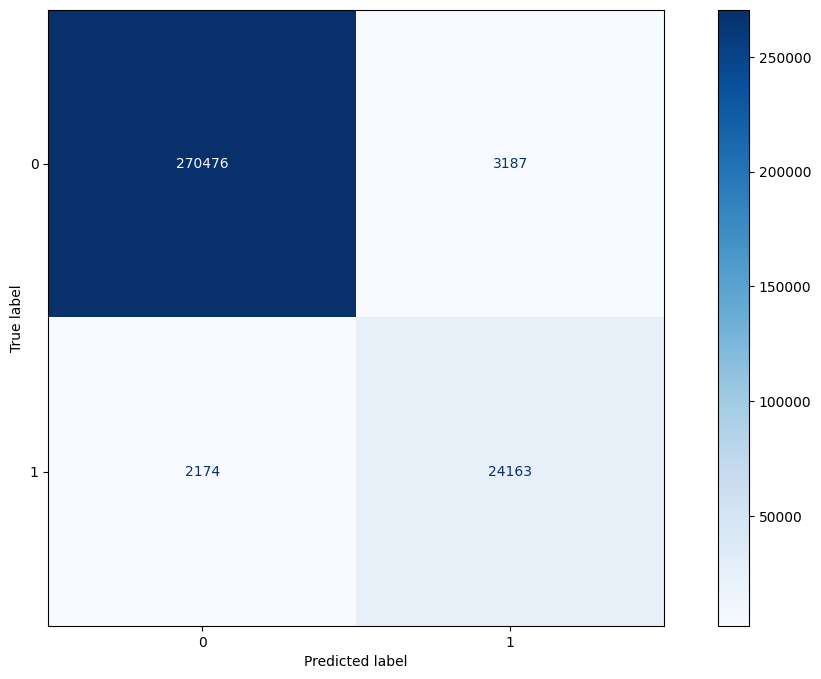

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    273663
           1       0.88      0.92      0.90     26337

    accuracy                           0.98    300000
   macro avg       0.94      0.95      0.95    300000
weighted avg       0.98      0.98      0.98    300000

------------------ More Specific classification_report --------------------
Accuracy:- 0.98213
Sensitivity:- 0.9174545316474921
Specificity:- 0.988354289765149
F1-Score:- 0.9001434239201296
------------------ ROC --------------------


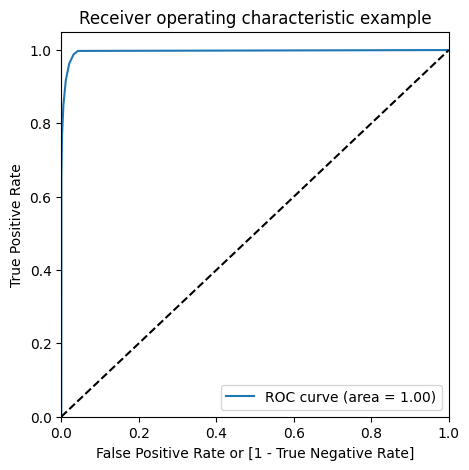

In [30]:
display_test_results("K-Nearest Neighbours", KNN)